#### Step_0 setting up libraries and dataset


In [ ]:
import pandas as pd
import sklearn
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import linkage
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

In [ ]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')

red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
red.mean()


fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [ ]:
# setting up X and Y and scalling

X = pd.DataFrame(scale(red), index=red.index, columns=red.columns)


In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


### 1.1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.


Text(0.5, 1.0, 'Elbow curve')

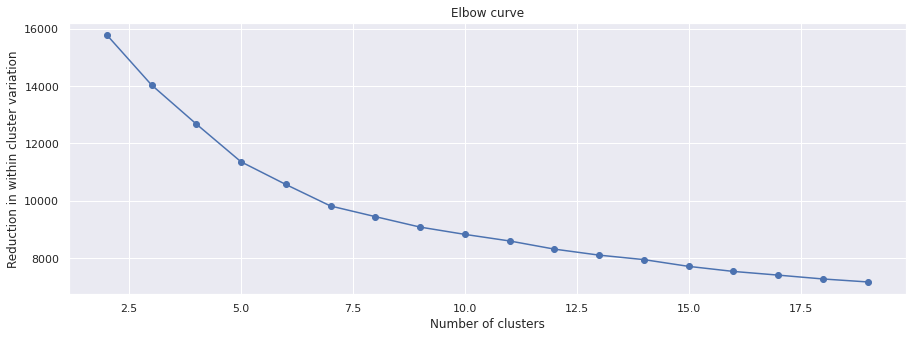

In [ ]:
within_cluster_variance = [] 
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve')

In [ ]:
km1 = KMeans(n_clusters=6, n_init=20)
km1_fitted = km1.fit(X)

In [ ]:
X['knn_cluster'] = km1_fitted.labels_
display(X.groupby('knn_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
knn_cluster,,,,,,,,,,,,
0,-0.620573,-0.472219,-0.123003,-0.225807,-0.384421,0.147014,-0.228804,-1.157740,0.543424,0.204058,1.236561,0.850795
1,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
2,-0.488359,0.692672,-0.819448,-0.215142,-0.071351,-0.435428,-0.420443,-0.089672,0.429588,-0.418980,-0.409470,-0.460627
3,1.378218,-0.689121,1.153195,0.102163,-0.004633,-0.565416,-0.546030,0.799599,-0.856073,0.341125,0.196998,0.422209
4,-0.188637,-0.051583,0.400212,4.244759,0.206318,1.589869,1.742223,1.035402,-0.194548,0.085332,-0.315419,-0.222342
5,-0.041842,0.072370,0.069753,-0.100205,-0.030330,0.937458,1.187992,0.264947,-0.142706,-0.221541,-0.624626,-0.464036




 In the first cluster where qualitiy is very high, alcohol is very high as well, and pH is the highest. So in the case of the 1st cluster, mean of qulity is 0.85 and the level of alchol is 1.24, and the pH level is 0.54. ALso where quality is the highest (0.85), density anf chlorides are the lowest (-0.38). Higher quility wines are also pairs with lower volatile acidity (-0.47 and -0.69). Higher quality wines have higher fixed acidity as well

 The mean of the quality of the wine is the lowest in the third (-0.46) and sixth cluster (-0.464). In both clusters the alcohol is lower than in other clusters (-0.32 and -0.62). Lower quality wines pairs with higher total sulfur dioxide in the case of 5th (1.74) and 6th (1.18) cluster. Lower quality wines have lower fixed acidity as well.

### 1.2. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

Since we scalled the data, variables that has higher absolute number is more important to this analysis. Such as higher alcohol level of the wine, high citric acid, low fixed acidity are all important characteristics of a good bottle of wine. 

### 2.1. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.
### Describe variables that cluster with higher values of wine quality. 

In [ ]:
X = pd.DataFrame(scale(red), index=red.index, columns=red.columns)

In [ ]:
row_dist = pd.DataFrame(squareform(pdist(X, metric='euclidean')))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598
0,0.000000,3.047373,2.036272,5.132132,0.000000,0.353963,2.007847,3.301943,2.858352,4.723499,2.302865,4.723499,2.479129,6.391713,6.619772,6.662183,5.874025,8.192239,2.558199,8.027388,4.478087,2.938802,3.677264,2.900529,2.617674,2.650784,2.843648,3.677264,0.543203,1.875400,2.369901,2.254240,3.532296,7.211980,3.216656,3.089121,2.377851,4.041870,4.182675,4.582414,...,4.390205,4.390205,4.390205,2.161195,2.161195,2.161195,3.357560,5.544577,2.161195,2.219885,3.471210,6.571340,3.393764,3.826762,4.005169,10.124131,4.203728,4.870324,3.760439,2.975652,3.224446,4.205500,3.224446,3.476739,3.886633,5.333587,4.690033,5.133905,2.891128,5.643142,5.072569,4.419025,3.585463,3.409960,2.806927,2.961242,4.133216,3.409960,2.893352,4.411231
1,3.047373,0.000000,1.348210,5.175964,3.047373,3.012176,2.587129,4.082473,3.944223,4.280871,2.472604,4.280871,3.721191,6.036638,4.670857,4.726979,5.411071,7.251281,3.723807,7.269315,4.975604,3.891320,3.588690,2.943638,3.569674,3.922266,4.069235,3.588690,2.710174,3.207804,2.162776,2.786494,2.263462,6.749496,4.264963,4.080149,3.844906,4.397876,4.550172,4.374163,...,3.110099,3.110099,3.110099,2.688304,2.688304,2.688304,3.010272,5.787576,2.688304,2.574557,4.319546,6.312528,4.411952,2.900026,4.655262,9.889565,4.367157,5.206606,4.381886,3.502123,3.993512,4.895876,3.993512,4.402319,3.379016,5.278146,4.467618,4.744704,3.924421,4.334957,4.244980,3.956164,4.669184,3.444768,2.910915,3.004307,4.015589,3.444768,3.326967,4.879772
2,2.036272,1.348210,0.000000,4.563223,2.036272,2.026811,1.699409,3.475064,3.102931,4.026106,1.672442,4.026106,3.085940,5.747897,5.415123,5.456271,5.241534,7.238752,2.843057,7.097100,4.422168,3.218215,2.795269,2.018471,2.809783,2.881963,2.880887,2.795269,1.767013,2.166593,1.632335,2.311325,2.058961,6.973151,3.378290,3.346386,2.730336,3.656191,4.267598,3.935303,...,3.298867,3.298867,3.298867,1.726607,1.726607,1.726607,2.825624,5.218353,1.726607,1.980407,3.609247,5.952206,3.587831,3.100659,4.086743,9.790435,3.655214,4.484174,3.875354,2.786263,3.474390,4.030996,3.474390,3.803688,3.249109,4.830547,4.004938,4.505041,3.278366,4.551437,4.456759,3.719962,4.137863,3.109376,2.620914,2.797399,3.982945,3.109376,3.105273,4.215431
3,5.132132,5.175964,4.563223,0.000000,5.132132,4.990647,4.147335,5.172647,4.498649,4.772853,4.427449,4.772853,5.931835,6.875779,6.209468,6.245777,3.368973,8.114096,5.300361,6.757237,2.490858,3.743408,3.860643,3.470026,3.930922,4.374776,3.797283,3.860643,5.116716,4.642786,4.805319,5.068860,4.162358,7.942626,4.523912,5.324932,4.394505,3.086051,7.809678,4.615337,...,4.303309,4.303309,4.303309,4.629974,4.629974,4.629974,5.315920,3.775121,4.629974,4.256013,5.178125,6.112197,4.653014,4.515620,5.712478,9.425596,3.987691,2.973316,5.945572,5.003745,5.654925,4.093226,5.654925,6.307001,4.334380,4.241543,3.877824,4.095570,5.464290,5.447638,6.196656,5.341266,6.554177,4.771542,4.816286,5.302883,5.689969,4.771542,5.652720,4.054850
4,0.000000,3.047373,2.036272,5.132132,0.000000,0.353963,2.007847,3.301943,2.858352,4.723499,2.302865,4.723499,2.479129,6.391713,6.619772,6.662183,5.874025,8.192239,2.558199,8.027388,4.478087,2.938802,3.677264,2.900529,2.617674,2.650784,2.843648,3.677264,0.543203,1.875400,2.369901,2.254240,3.532296,7.211980,3.216656,3.089121,2.377851,4.041870,4.182675,4.582414,...,4.390205,4.390205,4.390205,2.161195,2.161195,2.161195,3.357560,5.544577,2.161195,2.219885,3.471210,6.571340,3.393764,3.826762,4.005169,10.124131,4.203728,4.870324,3.760439,2.975652,3.224446,4.205500,3.224446,3.476739,3.886633,5.333587,4.690033,5.133905,2.891128,5.643142,5.072569,4.419025,3.585463,3.409960,2.806927,2.961242,4.133216,3.409960,2.893352,4.411231
...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
ac = AgglomerativeClustering(n_clusters=6,  
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)    
print(labels)


[0 0 0 ... 0 0 0]


In [ ]:
print(X.values)

row_clusters = linkage(X.values, method='complete', metric='euclidean')

[[-0.52835961  0.96187667 -1.39147228 ... -0.57920652 -0.96024611
  -0.78782264]
 [-0.29854743  1.96744245 -1.39147228 ...  0.1289504  -0.58477711
  -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 ... -0.04808883 -0.58477711
  -0.78782264]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.54204194  0.54162988
   0.45084835]
 [-1.39015528  0.65462046 -0.77526673 ...  0.30598963 -0.20930812
  -0.78782264]
 [-1.33270223 -1.21684919  1.02199944 ...  0.01092425  0.54162988
   0.45084835]]


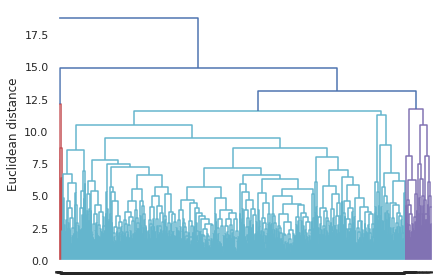

In [ ]:
row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')

plt.show()

In [ ]:
hir_fitted = ac.fit(X)

In [ ]:
X['hir_cluster'] = hir_fitted.labels_
display(X.groupby('hir_cluster').mean())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
hir_cluster,,,,,,,,,,,,
0,-0.088200,0.035595,-0.090699,-0.064045,-0.133744,0.005247,-0.019843,-0.077709,0.111066,-0.140651,0.030863,-0.010170
1,0.012429,-0.100884,0.528057,-0.328215,2.707187,-0.106439,0.430325,0.260289,-1.022300,2.585018,-0.724833,-0.335609
2,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629
5,2.482856,-0.657106,1.592896,0.192963,-0.056174,-0.471818,-0.452472,1.468131,-1.625762,0.646183,0.131191,0.669437


Generally, higher quality wines tend to have low pH level and higher citric acid as well. For example, in the cluster 5, where the mean of the quility is 1.27 the pH is -1.26 and the citric acid is 1.37. Furthermore, wine that has higer quality usually have lower chlorides and lower volatile aciditiy as well. In the cluster of 5 and 6, mean of chlorides is -0.68 and -0.056 respectevily. In the cluster the the mean of the quality is the highest (1.28), the mean of the densitiy is the lowest (-1.26), while second highest quilty (0.67) mean cluster has the second highest denisty (1.47). 


### 2.2. If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

The most important charactersitics for a good bottle of wine are lower pH, density, higher citric acid, lower volatile acid and lower fixed acid and higher alchol level, according the cluster analysis. This conslusion is very similar to the K-mean clustering, expet in the Hierarchical clustering volatile level, pH and density are more important characterisics than in K-mean clustering. 

K-means clustering requires to pre-specify the number of clusters, but hierachical clustering does not require that. 




### 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [ ]:
X = pd.DataFrame(scale(red), index=red.index, columns=red.columns)

In [ ]:
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[-1.77944158,  1.15730315],
       [-1.00418467,  2.07183784],
       [-0.91578319,  1.3934342 ],
       ...,
       [-1.36626511, -0.51756099],
       [-2.36714672,  0.70354479],
       [-0.28877628, -1.24084585]])

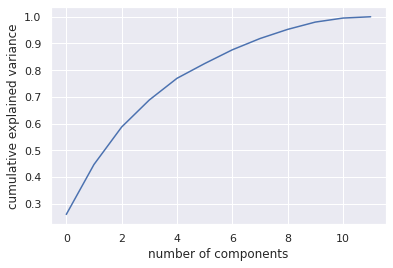

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print(pca.components_) 

[[ 0.48788336 -0.26512898  0.47333547  0.13915442  0.19742679 -0.04588071
   0.00406675  0.37030119 -0.43272085  0.25453535 -0.07317678  0.11248878]
 [-0.00417321  0.33896786 -0.1373581   0.16773634  0.18978819  0.25948314
   0.36397137  0.33078079 -0.06544015 -0.10933362 -0.50270865 -0.47316621]
 [-0.16482854 -0.22708884  0.10022856  0.24362014 -0.02660785  0.61611132
   0.54073214 -0.16872267  0.06977056  0.21291324  0.22497138  0.22336929]
 [-0.23109808  0.04185824 -0.0567358  -0.38303758  0.65477782 -0.03371148
  -0.02845973 -0.20069341 -0.00546618  0.56050237 -0.09170143 -0.03666923]
 [-0.07877938  0.29937933 -0.12014871  0.70936319  0.26623723 -0.15941286
  -0.21845284  0.20879298  0.25764682  0.21483493  0.25972635  0.13758414]
 [ 0.0555313   0.297287    0.13663328  0.10931059  0.33733656 -0.04264807
   0.1159536  -0.42566742 -0.48035396 -0.40374303  0.39217625 -0.14183046]
 [-0.30721496 -0.62623369  0.24414858  0.28385429  0.23054697 -0.13826041
  -0.11020865 -0.12254646  0.185

In [ ]:
print(pca.explained_variance_)

[3.12312087 2.24328497 1.68397283 1.21578121 0.97387267 0.66300688
 0.61870473 0.50618912 0.41156493 0.3281246  0.18033141 0.05955516]


that how much they explain 

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X) # create X data with single pca vector
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1599, 12)
transformed shape: (1599, 2)


In [ ]:
pca.explained_variance_ratio_

array([0.26009731, 0.1868235 ])

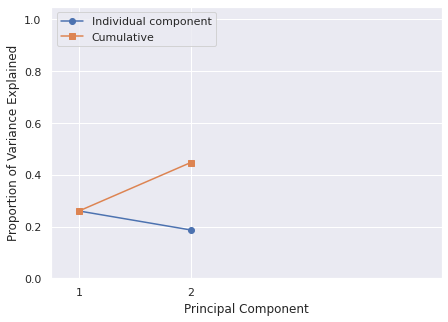

In [ ]:
plt.figure(figsize=(7,5))

plt.plot([1,2], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2])
plt.legend(loc=2); #this is part of the homework 

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.44692081170691716

The first two principal componant according the variance ratio, explain around 45% of the variation in the data. The first one is around 26% and the second 19%. 

PCA could be very useful in supervised learning when the dataset contains a lot of variables. PCA is a good way for dimension reducation, so the data can be handled easier, alow-dimensional representation of the
observations that explains a good fraction of the variance. So PCA produces a low-dimensional representation of the dataset. Other than producing derived variables, PCA is also used for data visualization. 